In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from func_preprocesamiento import acotar_caracteristicas

In [3]:
def precio_por_m2(df):
    df['precio_por_m2'] = df['precio_pesos_constantes'] / df['SConstrM2']
    return df

In [4]:
df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')
df = acotar_caracteristicas(df)
#df_m2 = precio_por_m2(df)

/tmp/ipykernel_65805/616181032.py:1: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')


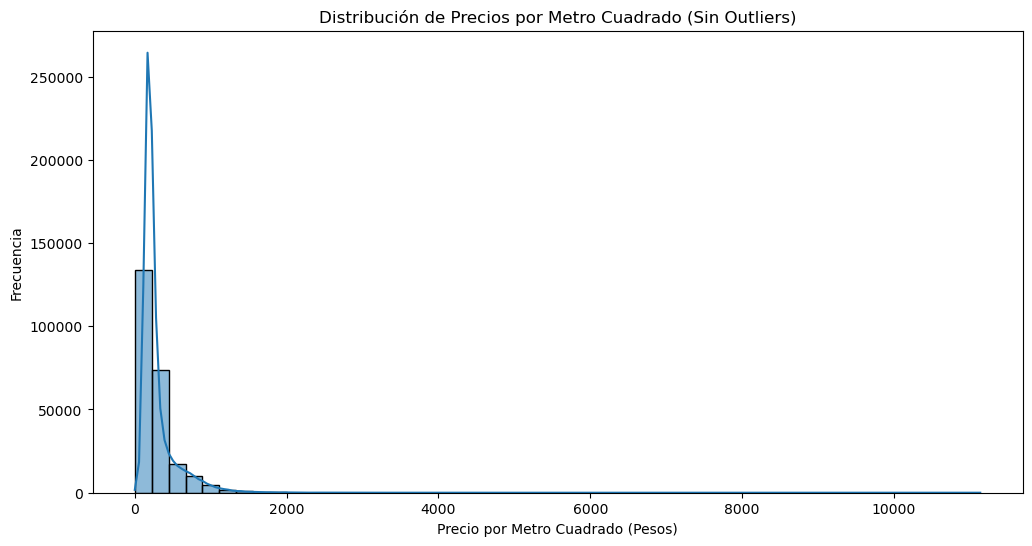

Cantidad de valores originales: 245388
Cantidad de valores después de eliminar outliers: 242247


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes el DataFrame `alquileres_df` con la columna 'precio_por_m2'
alquileres_df = precio_por_m2(df)

# Calcular la media y la desviación estándar
mean_precio_m2 = alquileres_df['precio_por_m2'].mean()
std_precio_m2 = alquileres_df['precio_por_m2'].std()

# Definir límites para detectar outliers (2 desviaciones estándar)
lower_bound = mean_precio_m2 - 1 * std_precio_m2
upper_bound = mean_precio_m2 + 1 * std_precio_m2

# Filtrar los valores dentro de los límites
filtered_df = alquileres_df[(alquileres_df['precio_por_m2'] >= lower_bound) & (alquileres_df['precio_por_m2'] <= upper_bound)]

# Histograma de los nuevos valores
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['precio_por_m2'], bins=50, kde=True)
plt.title('Distribución de Precios por Metro Cuadrado (Sin Outliers)')
plt.xlabel('Precio por Metro Cuadrado (Pesos)')
plt.ylabel('Frecuencia')
plt.show()

print(f"Cantidad de valores originales: {alquileres_df.shape[0]}")
print(f"Cantidad de valores después de eliminar outliers: {filtered_df.shape[0]}")


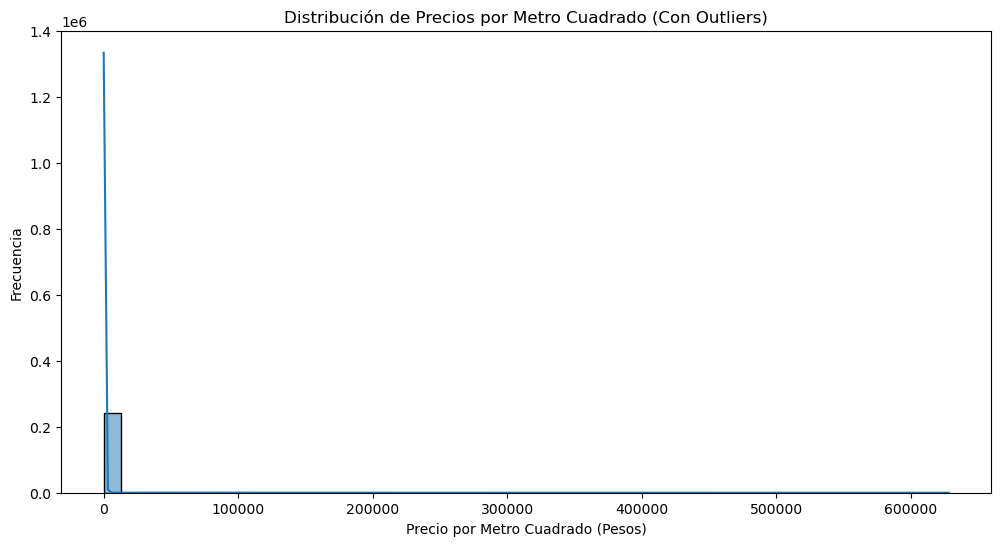

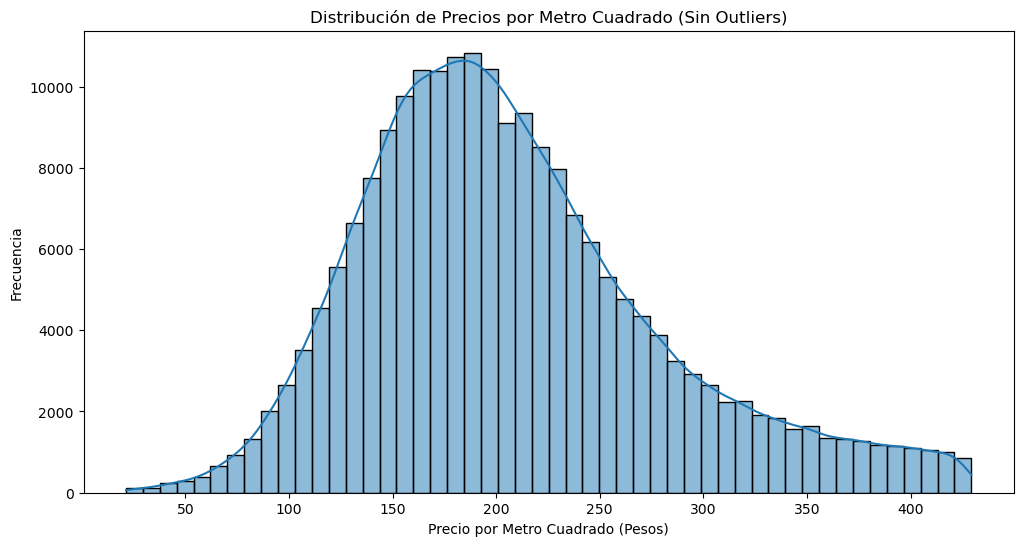

Cantidad de valores originales: 245388
Cantidad de valores después de eliminar outliers: 205022


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes el DataFrame `alquileres_df` con la columna 'precio_por_m2'
alquileres_df = precio_por_m2(df)

plt.figure(figsize=(12, 6))
sns.histplot(alquileres_df['precio_por_m2'], bins=50, kde=True)
plt.title('Distribución de Precios por Metro Cuadrado (Con Outliers)')
plt.xlabel('Precio por Metro Cuadrado (Pesos)')
plt.ylabel('Frecuencia')
plt.show()

# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = alquileres_df['precio_por_m2'].quantile(0.30)
Q3 = alquileres_df['precio_por_m2'].quantile(0.70)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores dentro de los límites
filtered_df = alquileres_df[(alquileres_df['precio_por_m2'] >= lower_bound) & (alquileres_df['precio_por_m2'] <= upper_bound)]

# Histograma de los nuevos valores
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['precio_por_m2'], bins=50, kde=True)
plt.title('Distribución de Precios por Metro Cuadrado (Sin Outliers)')
plt.xlabel('Precio por Metro Cuadrado (Pesos)')
plt.ylabel('Frecuencia')
plt.show()

print(f"Cantidad de valores originales: {alquileres_df.shape[0]}")
print(f"Cantidad de valores después de eliminar outliers: {filtered_df.shape[0]}")


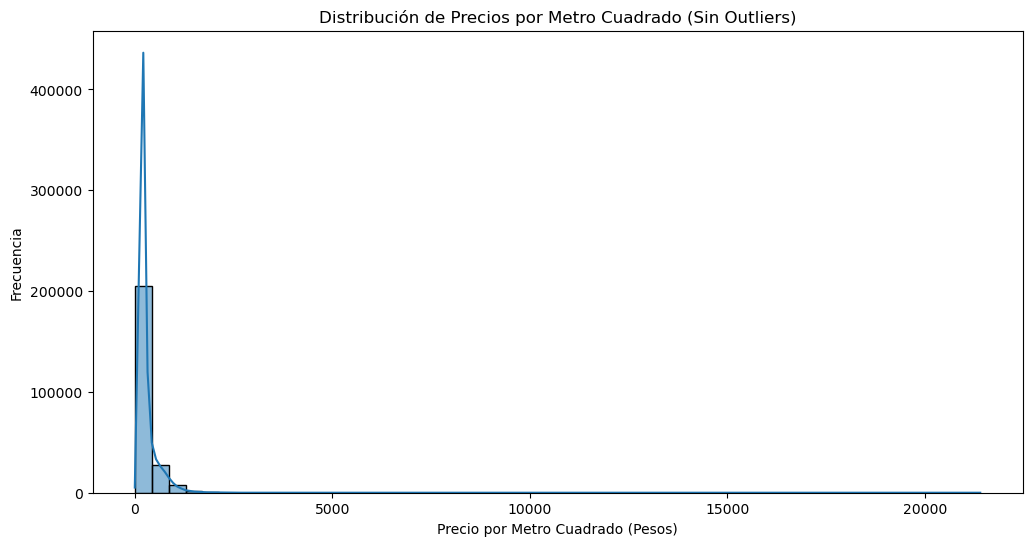

Cantidad de valores originales: 245388
Cantidad de valores después de eliminar outliers: 242305


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes el DataFrame `alquileres_df` con la columna 'precio_por_m2'
alquileres_df = precio_por_m2(df)

# Calcular la media y la desviación estándar
mean_precio_m2 = alquileres_df['precio_por_m2'].mean()
std_precio_m2 = alquileres_df['precio_por_m2'].std()

# Definir límites para detectar outliers (por ejemplo, usando 2 desviaciones estándar)
lower_bound = mean_precio_m2 - 2 * std_precio_m2
upper_bound = mean_precio_m2 + 2 * std_precio_m2

# Filtrar los valores dentro de los límites
filtered_df = alquileres_df[(alquileres_df['precio_por_m2'] >= lower_bound) & (alquileres_df['precio_por_m2'] <= upper_bound)]

# Histograma de los nuevos valores
plt.figure(figsize=(12, 6))
sns.histplot(filtered_df['precio_por_m2'], bins=50, kde=True)
plt.title('Distribución de Precios por Metro Cuadrado (Sin Outliers)')
plt.xlabel('Precio por Metro Cuadrado (Pesos)')
plt.ylabel('Frecuencia')
plt.show()

print(f"Cantidad de valores originales: {alquileres_df.shape[0]}")
print(f"Cantidad de valores después de eliminar outliers: {filtered_df.shape[0]}")


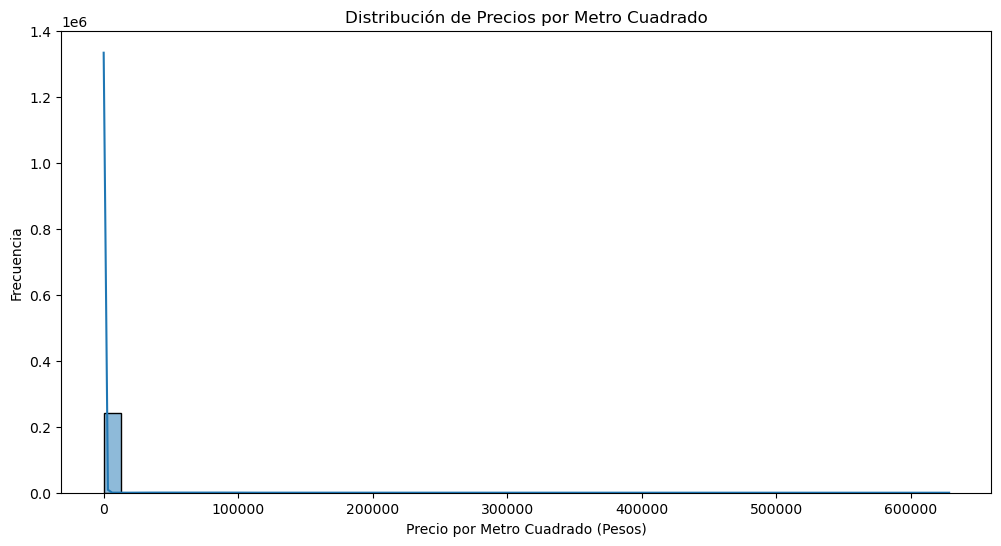

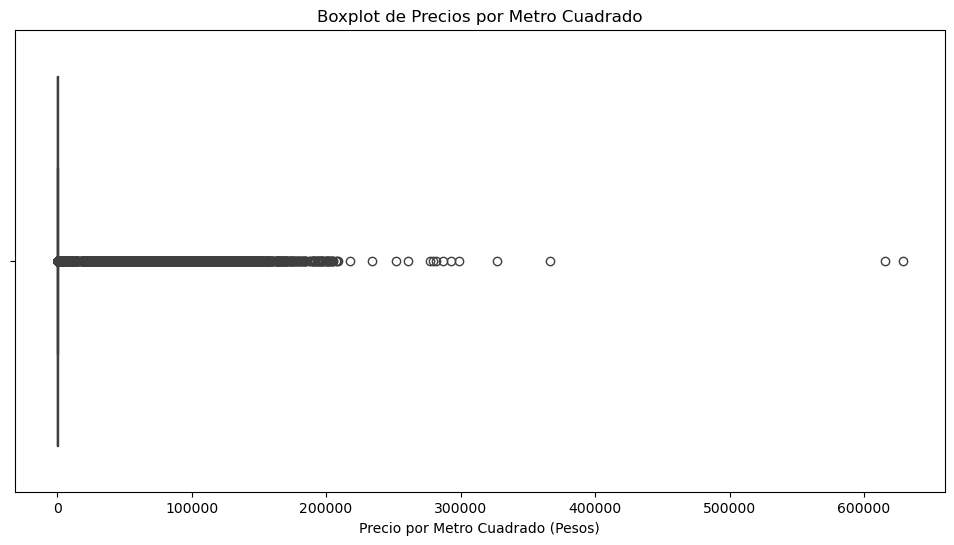

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes el DataFrame `alquileres_df` con la columna 'precio_por_m2'
alquileres_df = precio_por_m2(df)

# Histograma
plt.figure(figsize=(12, 6))
sns.histplot(alquileres_df['precio_por_m2'], bins=50, kde=True)
plt.title('Distribución de Precios por Metro Cuadrado')
plt.xlabel('Precio por Metro Cuadrado (Pesos)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=alquileres_df['precio_por_m2'])
plt.title('Boxplot de Precios por Metro Cuadrado')
plt.xlabel('Precio por Metro Cuadrado (Pesos)')
plt.show()


In [7]:
# Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
Q1 = alquileres_df['precio_por_m2'].quantile(0.25)
Q3 = alquileres_df['precio_por_m2'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = alquileres_df[(alquileres_df['precio_por_m2'] < lower_bound) | (alquileres_df['precio_por_m2'] > upper_bound)]

print(f"Cantidad de outliers: {outliers.shape[0]}")
print(outliers)


Cantidad de outliers: 30921
        id_grid  MesListing TIPOPROPIEDAD  STotalM2  SConstrM2  Dormitorios  \
4         57804  2021-04-01  Departamento     300.0      300.0            2   
59        62714  2022-10-01  Departamento     175.0      142.0            2   
63        56496  2021-07-01  Departamento      70.0       67.0            1   
66        66325  2021-12-01  Departamento     310.0      270.0            6   
82        58797  2021-02-01  Departamento      90.0       90.0            2   
...         ...         ...           ...       ...        ...          ...   
278681    61409  2021-11-01  Departamento     133.0      119.0            3   
278699    69938  2022-12-01  Departamento     316.0      296.0            3   
278700    68303  2022-10-01  Departamento     330.0      300.0            4   
278709    91231  2021-09-01  Departamento     300.0       80.0            2   
278715    63055  2022-05-01  Departamento     196.0      196.0            3   

        Banos  Ambiente

Media: 1299.3408168634987, Desviación Estándar: 10073.117485754048


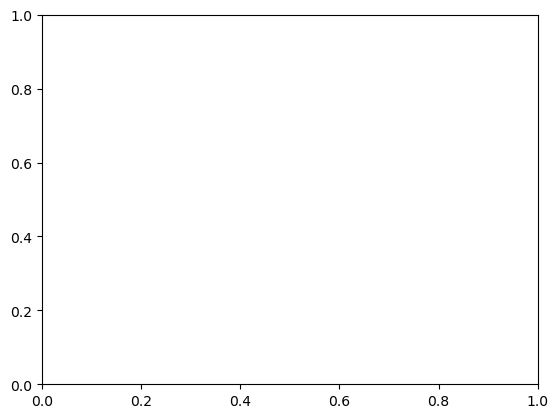

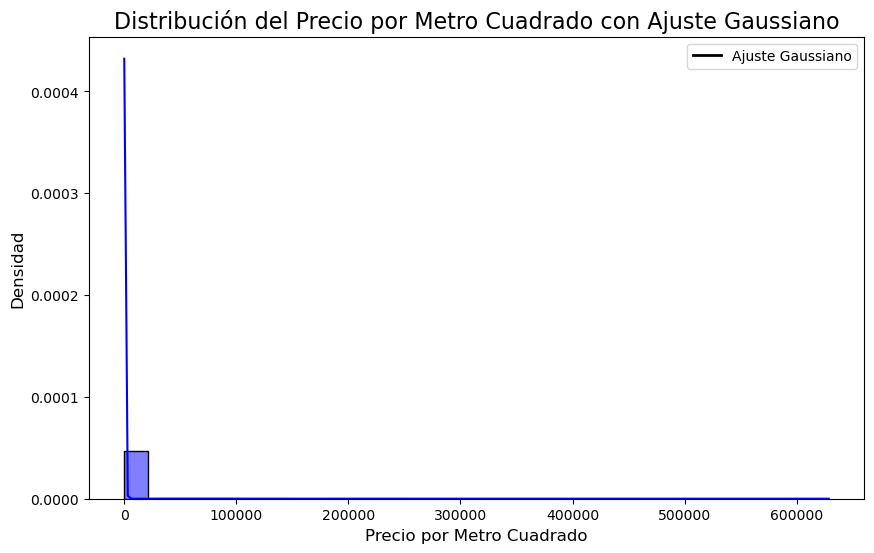

In [8]:
import scipy as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

mu, std = stats.norm.fit(df['precio_por_m2'])
print(f"Media: {mu}, Desviación Estándar: {std}")

xmin, xmax = plt.xlim()  # Limites del gráfico
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

# Visualizar
plt.figure(figsize=(10, 6))
sns.histplot(df['precio_por_m2'], kde=True, color='blue', stat='density', bins=30)
plt.plot(x, p, 'k', linewidth=2, label='Ajuste Gaussiano')
plt.title('Distribución del Precio por Metro Cuadrado con Ajuste Gaussiano', fontsize=16)
plt.xlabel('Precio por Metro Cuadrado', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.show()

In [9]:
import matplotlib.pyplot as plt

print("Media: ", df_m2['precio_por_m2'].mean())
print("Mediana: ", df_m2['precio_por_m2'].median())
print("Desviación estándar: ", df_m2['precio_por_m2'].std())

plt.figure(figsize=(10, 6))
df_m2['precio_por_m2'].hist(bins=10000)
plt.xlabel('Precio por m2')
plt.ylabel('Frecuencia')

plt.xscale('log')
plt.title('Distribución de Precio por m2')
plt.show()

NameError: name 'df_m2' is not defined

In [ ]:
df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')
df = acotar_caracteristicas(df)
X = df.drop(columns=['precio_pesos_constantes']) 
y = df['precio_pesos_constantes']  

y_bins = pd.qcut(y, q=5, labels=False)              
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y_bins
)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
print('a\n')
train_data.to_csv('../Dataset/raw/dev_lim.csv', index=False)
test_data.to_csv('../Dataset/raw/test_lim.csv', index=False)

/tmp/ipykernel_51242/2658601518.py:1: DtypeWarning: Columns (8,33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/raw/alquiler_AMBA_dev.csv')


a

